# **Load libraries**

In [71]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

# **Load dataset**

In [72]:
# Load phone data set
phoneData = pd.read_csv("phoneData.csv")

phone = phoneData.head(100)

# **Explore data**

In [73]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     100 non-null    int64  
 1   Device Model                100 non-null    object 
 2   Operating System            100 non-null    object 
 3   App Usage Time (min/day)    100 non-null    int64  
 4   Screen On Time (hours/day)  100 non-null    float64
 5   Battery Drain (mAh/day)     100 non-null    int64  
 6   Number of Apps Installed    100 non-null    int64  
 7   Data Usage (MB/day)         100 non-null    int64  
 8   Age                         100 non-null    int64  
 9   Gender                      100 non-null    object 
 10  User Behavior Class         100 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.7+ KB


In [74]:
phone.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,290.550000,5.560000,1609.150000,53.660000,967.940000,37.820000,3.140000
std,29.011492,178.917078,3.057199,810.850089,26.534224,621.408937,12.110084,1.378185
min,1.000000,31.000000,1.100000,333.000000,10.000000,105.000000,18.000000,1.000000
25%,25.750000,133.500000,2.675000,838.500000,31.750000,387.750000,27.750000,2.000000
50%,50.500000,258.500000,5.550000,1661.000000,55.500000,946.500000,38.500000,3.000000
75%,75.250000,453.250000,7.425000,2320.750000,77.000000,1388.000000,49.000000,4.000000
max,100.000000,593.000000,12.000000,2956.000000,99.000000,2415.000000,58.000000,5.000000


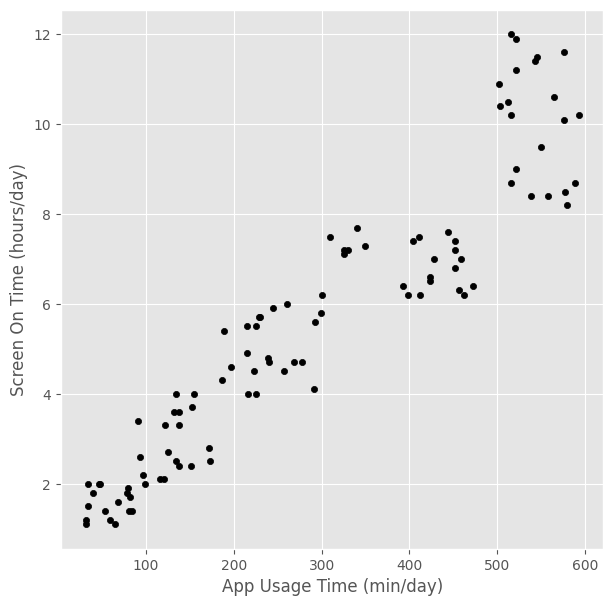

In [75]:
phone.plot(kind="scatter",
           x="App Usage Time (min/day)",
           y="Screen On Time (hours/day)",
           figsize=(7,7),
           color="black");

# **Load model - Linear Regression**

In [76]:
from sklearn import linear_model

# Train model

In [77]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(phone["App Usage Time (min/day)"]),
                     y = pd.DataFrame(phone["Screen On Time (hours/day)"]))

LinearRegression()

In [78]:
# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

[0.89507614]
[[0.01605549]]


# Evaluate model

In [79]:
print("Model Accuracy:")
regression_model.score(X = pd.DataFrame(phone["App Usage Time (min/day)"]),
                       y = phone["Screen On Time (hours/day)"])

Model Accuracy:


0.8828838729751587

In [80]:
train_prediction = regression_model.predict(X = pd.DataFrame(phone["App Usage Time (min/day)"]))

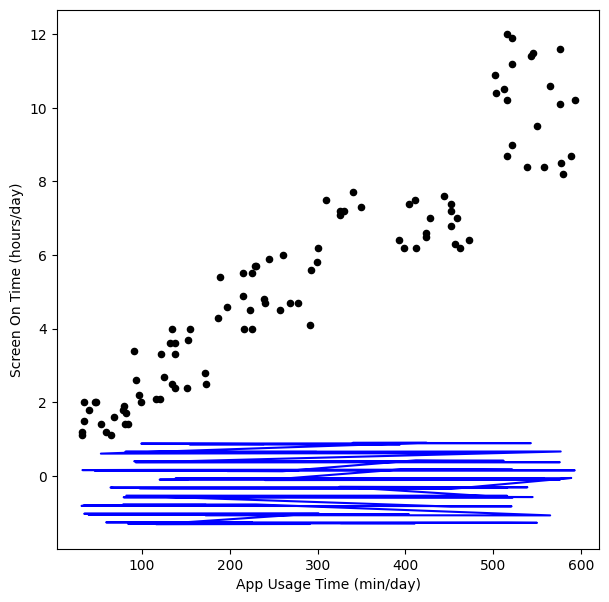

In [117]:
phone.plot(kind="scatter",
           x="App Usage Time (min/day)",
           y="Screen On Time (hours/day)",
           figsize=(7,7),
           color="black");

# Plot regression line
plt.plot(phone["App Usage Time (min/day)"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

In [121]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(train_prediction, phone["Screen On Time (hours/day)"])

MSE

np.float64(42.508383836372666)

# **Load model - Polynomial Regression**

In [122]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([phone["App Usage Time (min/day)"],           # Include weight
                           phone["App Usage Time (min/day)"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors,
               y = phone["Screen On Time (hours/day)"])


LinearRegression()

In [123]:
# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

Model intercept
0.7137893791898602
Model Coefficients
[ 1.78335748e-02 -2.88806352e-06]


# Evaluate model

In [124]:
print("Model Accuracy:")
print(poly_model.score(X = predictors,
                 y = phone["Screen On Time (hours/day)"]))

Model Accuracy:
0.8834380401387616


c:\Users\jucruz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


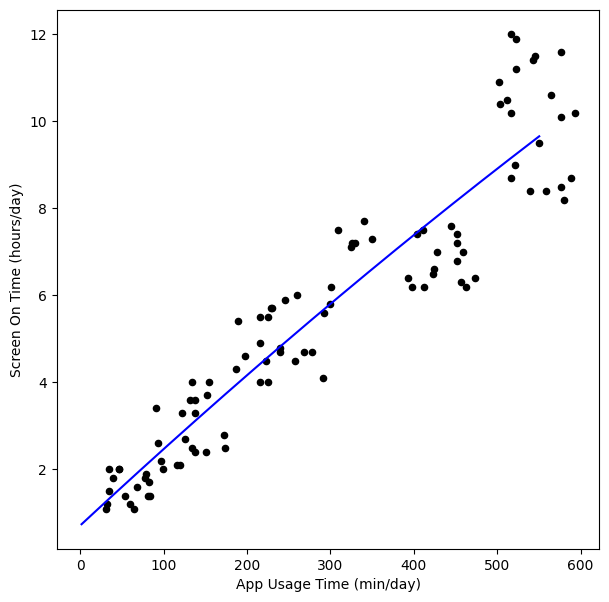

In [131]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 550.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

phone.plot(kind="scatter",
           x="App Usage Time (min/day)",
           y="Screen On Time (hours/day)",
           figsize=(7,7),
           color="black");

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

In [132]:
train_prediction = poly_model.predict(X = pd.DataFrame([phone["App Usage Time (min/day)"], phone["App Usage Time (min/day)"]**2]).T )

In [133]:
MSE = mean_squared_error(train_prediction, phone["Screen On Time (hours/day)"])

MSE

np.float64(1.0785478145960388)

# **New Polynomial Regression Model**

In [134]:
pd.DataFrame([phone["App Usage Time (min/day)"],           # Include weight
                           phone["App Usage Time (min/day)"]**2,         # Include weight squared
                          phone["App Usage Time (min/day)"]**3]).T

,App Usage Time (min/day),App Usage Time (min/day),App Usage Time (min/day)
0,393,154449,60698457
1,268,71824,19248832
2,154,23716,3652264
3,239,57121,13651919
4,187,34969,6539203
...,...,...,...
95,326,106276,34645976
96,550,302500,166375000
97,516,266256,137388096
98,59,3481,205379


In [135]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([phone["App Usage Time (min/day)"],           # Include weight
                           phone["App Usage Time (min/day)"]**2,         # Include weight squared
                          phone["App Usage Time (min/day)"]**3,         # Include weight squared
                          phone["App Usage Time (min/day)"]**4,         # Include weight squared
                          phone["App Usage Time (min/day)"]**5,         # Include weight squared
                          phone["App Usage Time (min/day)"]**6,         # Include weight squared
                          phone["App Usage Time (min/day)"]**7,         # Include weight squared
                          phone["App Usage Time (min/day)"]**8]).T       # Include weight cube

# Train the model using the new_cars data
poly_model.fit(X = predictors,
               y = phone["Screen On Time (hours/day)"])


LinearRegression()

In [136]:
# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

Model intercept
1.4335080087113488
Model Coefficients
[ 7.91555997e-11  1.47062364e-08  1.44473330e-06 -8.07800306e-09
  1.59832319e-11 -1.07250977e-14 -7.89595593e-20 -1.89110032e-20]


In [137]:
print("Model Accuracy:")
print(poly_model.score(X = predictors,
                 y = phone["Screen On Time (hours/day)"]))

Model Accuracy:
0.9128343073166508


c:\Users\jucruz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


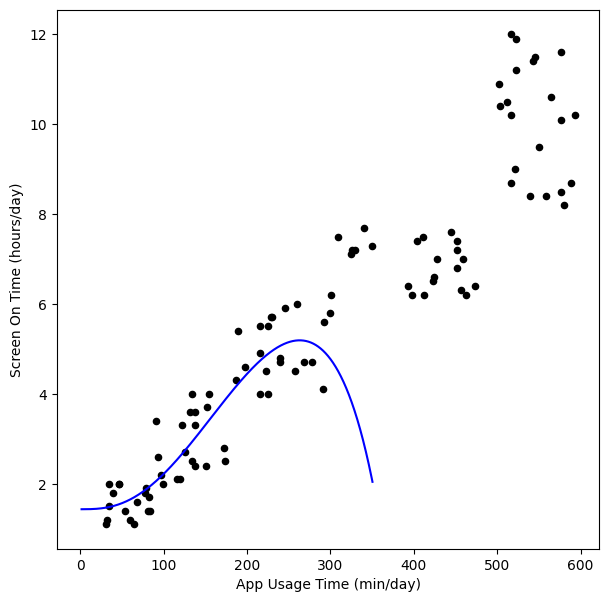

In [143]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 350.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2,
                                poly_line_range**3,
                                poly_line_range**4,
                                poly_line_range**5,
                                poly_line_range**6,
                                poly_line_range**7,
                                poly_line_range**8]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

phone.plot(kind="scatter",
           x="App Usage Time (min/day)",
           y="Screen On Time (hours/day)",
           figsize=(7,7),
           color="black");

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

In [144]:
train_prediction = poly_model.predict(X = pd.DataFrame([phone["App Usage Time (min/day)"], phone["App Usage Time (min/day)"]**2, phone["App Usage Time (min/day)"]**3, phone["App Usage Time (min/day)"]**4, phone["App Usage Time (min/day)"]**5, phone["App Usage Time (min/day)"]**6, phone["App Usage Time (min/day)"]**7, phone["App Usage Time (min/day)"]**8]).T )

In [145]:
MSE = mean_squared_error(train_prediction, phone["Screen On Time (hours/day)"])

MSE

np.float64(0.8065441543990302)

# **Load model - Multiple Linear Regression**

In [146]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the phone data
multi_reg_model.fit(X = phone.loc[:,["App Usage Time (min/day)","Age"]],
                     y = phone["Screen On Time (hours/day)"])

LinearRegression()

In [147]:
# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

1.1809896400886997
[ 0.01600785 -0.00719384]


# Evaluate model

In [148]:
x_pred = np.arange(1.5, 5.5, 0.4)
x_pred.flatten()

array([1.5, 1.9, 2.3, 2.7, 3.1, 3.5, 3.9, 4.3, 4.7, 5.1])

In [149]:
y_pred = np.linspace(50, 350, 10)
y_pred.flatten()

array([ 50.        ,  83.33333333, 116.66666667, 150.        ,
       183.33333333, 216.66666667, 250.        , 283.33333333,
       316.66666667, 350.        ])

In [150]:
train_prediction

array([ 6.69639453,  5.53327962,  3.40215625,  5.40977151,  4.17074317,
        2.2012253 ,  6.26590174, 10.52487074,  6.39193305,  7.13058757,
        1.59134268,  4.7271793 ,  7.8187729 ,  4.7271793 ,  4.21459994,
        8.4432057 ,  2.88614696,  5.84442407,  1.90632762,  9.79678933,
        2.09558379,  9.9002428 ,  7.13744802,  5.99199489,  4.74421831,
        2.06194721,  7.35813645, 10.11210902,  7.30197555,  6.84198065,
        5.53731795,  4.38467728,  5.82766501,  1.54118472,  8.90847516,
        1.47291846,  2.66325139, 10.32011992,  7.93594554,  6.6452351 ,
        5.41978286,  9.9002428 ,  2.62001177,  3.35449919,  3.02427651,
        8.60129584, 10.49518199,  3.02427651,  9.58858691,  9.07963977,
        7.30197555,  5.46437913,  2.72900551,  2.16524081, 10.02281135,
        1.73729659,  1.69318919, 10.35364516,  7.0424417 ,  6.27955   ,
       10.32011992,  6.25646718,  1.87781475, 10.44393385,  7.65999686,
        4.886304  ,  5.53067443,  2.93187888, 10.02281135,  1.92

c:\Users\jucruz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\jucruz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


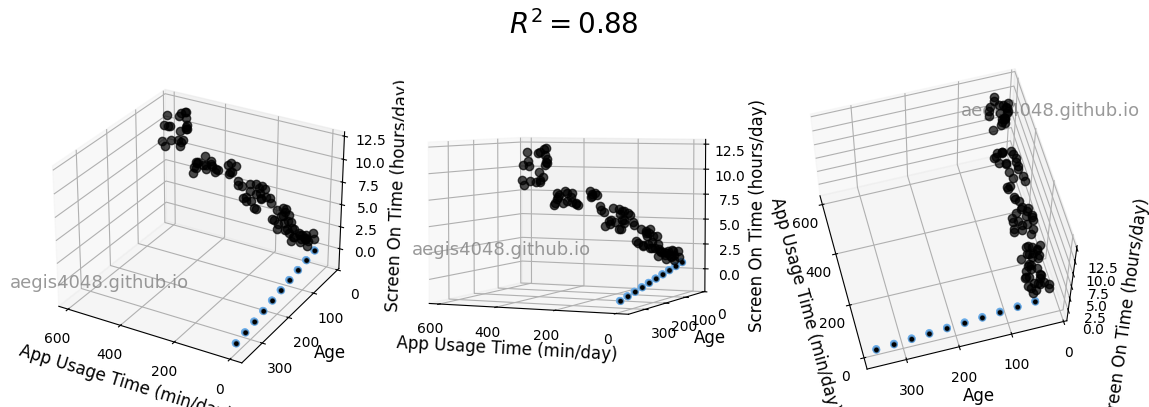

In [151]:
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X = phone.loc[:,["App Usage Time (min/day)","Age"]].values.reshape(-1,2)
Y = phone["Screen On Time (hours/day)"]

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.arange(1.5, 5.5, 0.4)   # range of App Usage Time (min/day) values
y_pred = np.linspace(50, 350, 10)  # range of Age values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
# predicted = model.predict(model_viz)
train_prediction = multi_reg_model.predict(model_viz)

############################################## Evaluate ############################################

r2 = multi_reg_model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.7)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), train_prediction, facecolor=(0,0,0,0), alpha = 0.5, s=20, edgecolor='#70b3f0')
    ax.set_xlabel('App Usage Time (min/day)', fontsize=12)
    ax.set_ylabel('Age', fontsize=12)
    ax.set_zlabel('Screen On Time (hours/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.8)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.8)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.8)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [152]:
# Check R-squared
print("Model accuracy:")
multi_reg_model.score(X = phone.loc[:,["App Usage Time (min/day)","Age"]],
                      y = phone["Screen On Time (hours/day)"])

Model accuracy:


0.8836881218373273

In [105]:
train_prediction = multi_reg_model.predict(X = phone.loc[:,["App Usage Time (min/day)","Age"]])

In [106]:
MSE = mean_squared_error(train_prediction, phone["Screen On Time (hours/day)"])

MSE

np.float64(1.0762338086392114)

Analysis of results

In [ ]:
# # What is the model’s accuracy on the test set?
#     the final accuracy of the model was 91%
# # Were there any challenges in preprocessing or splitting the data?
#     There defenitly way, I struggled to find a data set that I could easily use and with the one I ended up chooseing there was too many data points and i had to cut down what i was using fo the model
# # How could the model be improved (e.g., by using a different algorithm or tuning parameters)?
#     I think a reduction of the complexity of the model would benifit it because the last grapgh it slopes down away from the points 
# # What are the limitations of your model?
#     I doesn't really incorperate any other data as seen when I added age to it at the end, it really didn't seem to have much correlation.